In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import f1_score, recall_score,precision_score,cohen_kappa_score
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix

In [84]:
df_fake = pd.read_csv('generated/results_get_fake_built.csv')
df_real = pd.read_csv('generated/results_get_real_built.csv')

cv = CountVectorizer()
X = cv.fit_transform(np.append(df_fake['1'], df_real['1'], axis=0)).toarray()
print(X.shape)
y = np.append(df_fake['0'], df_real['0'], axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)

(2690, 7552)


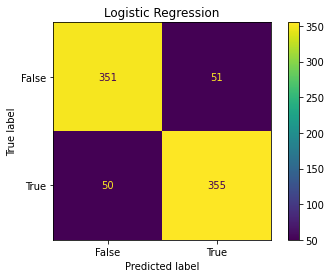

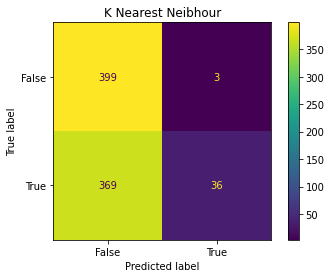

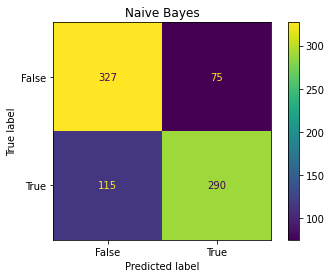

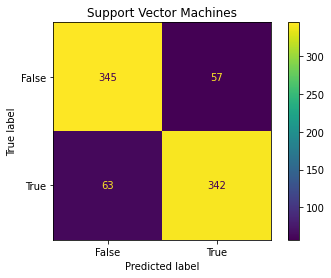

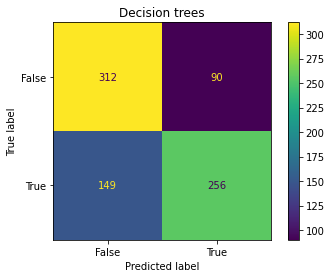

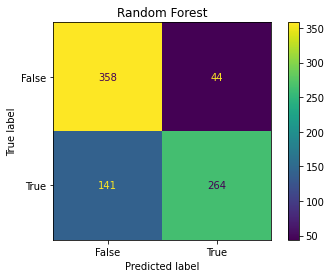

/home/prbpedro/Development/python_envs/tcc_puc_fake_news/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


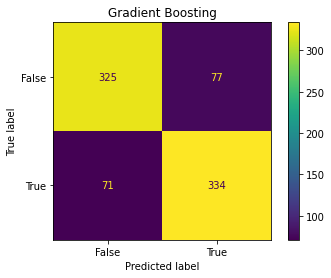

In [85]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K Nearest Neibhour': KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p=2),
    'Naive Bayes': GaussianNB() ,
    'Support Vector Machines': SVC(kernel = 'linear'),
    'Decision trees': DecisionTreeClassifier(criterion = 'entropy', random_state = 7),
    'Random Forest': RandomForestClassifier(n_estimators=10, criterion = 'entropy'), 
    'Gradient Boosting': XGBClassifier()
}

accuracy_list = []
f1_score_list = []
recall_list = []
precision_list = []
cohen_kappa_list = []

for key, model in classifiers.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    recall_list.append(recall_score(y_test,y_pred))
    precision_list.append(precision_score(y_test,y_pred))
    accuracy_list.append(accuracy_score(y_test,y_pred))
    f1_score_list.append(f1_score(y_test,y_pred))
    cohen_kappa_list.append(cohen_kappa_score(y_test,y_pred))
    
    plot_confusion_matrix(model, X_test, y_test)  
    plt.title(key)
    plt.show()

df = pd.DataFrame([recall_list, precision_list, accuracy_list, f1_score_list, cohen_kappa_list])
new_df = df.transpose()
new_df.columns = ['Recall','Precision','Overall Accuracy','F1 Score','Cohen Kappa Score']
new_df.index = classifiers.keys()

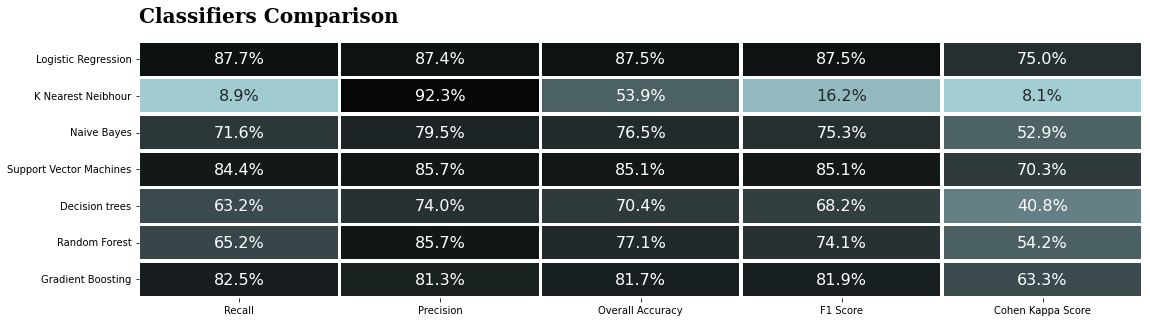

In [86]:
colors = matplotlib.colors.LinearSegmentedColormap.from_list("", [(0, 'powderblue'), (1, 'black')])
cmappable = ScalarMappable(norm=Normalize(0,1), cmap=colors)

background_color = "white"
fig = plt.figure(figsize=(18,26)) 
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])
sns.heatmap(new_df, cmap=colors, annot=True, fmt=".1%", vmin=0, vmax=0.95, linewidths=2.5, cbar=False ,ax=ax0, annot_kws={"fontsize":16})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

ax0.text(0,-0.5,'Classifiers Comparison', fontsize=20, fontweight='bold', fontfamily='serif')
plt.show()